# Data Visualization Project Solution

In this project, you will look at three bad visualizations then:

1. Identify what makes them bad
1. Use the same data to make a better chart
1. Explain an interesting pattern you noticed.

Some helpful questions to determine if a visualization is bad:

1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?
2. Is this the right visualization to use?
3. Does the visualization have the correct labels and axes limits?
4. Is there too much being shown in one visualization? Should it be split?

Some helpful questions to find patterns in a visualization:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

In [1]:
## Imports
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

To get you started, we'll walk through 1 bad visualization.

![Bad Line Chart](http://imgur.com/kB6uNZC.png)

In [2]:
# Bad line chart data & names
badLineNames = ["2016 Q1", "2016 Q2", "2016 Q3", "2016 Q4"]
badLineProduct1 = [240, 300, 280, 400]
badLineProduct2 = [300, 320, 150, 160]
badLineProduct3 = [120, 140, 180, 160]
badLineProduct4 = [380, 400, 450, 500]

**What makes this visualization bad?**

**1. What is the visualization trying to show? Ex. Comparison? Relationship? Change over time?**

This visualization trys to show data over time.

**2. Is this the right visualization to use?**

Yes, we should be using a line chart to show data over time.

**3. Does the visualization have the correct labels and axes limits?**

There are no labels or a title. We could also use some more space between the min and maximum data points and the axes limits.

**4. Is there too much being shown in one visualization? Should it be split?**

Yes, it's quite difficult to follow each series, it should be split.


Since the chart type is the correct one, it seems all we need to do is add labels and split the lines into panels. Before we do that, we can probably also improve the design. We covered how to improve a `matplotlib` plot in class using different styles. Select a `style` and apply it below.

In [3]:
## Apply your chosen style here
plt.style.use("ggplot")

Now we need to plot the data over different panels. We can use [`plt.subplots`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to create multiple panels. Since we have 4 products, we're going to need 4 panels on top of each other. `subplots` returns two variables, the figure object and an array of axes. What we can do is loop through each Axes object and create a plot for that product. The first Axes object should plot the first product, the second should plot the second product and so on.

Here are the steps you should follow:

1. Create 4 line charts on top of each other, each plotting one of the products
1. Make sure all the y scales are the same. You can set the y scale using `set_ylim` on the Axes object. Consider adding some buffer between the lowest value and the start of the y axis as well as between the highest value and the end of the y axis.
1. Remove the x labels for all panels except the bottom one
1. Add a title to each of the plots with the product number
1. Add a title to the figure
1. Calculate either the mean or median of the entire data set and add a dashed line on each panel with that value

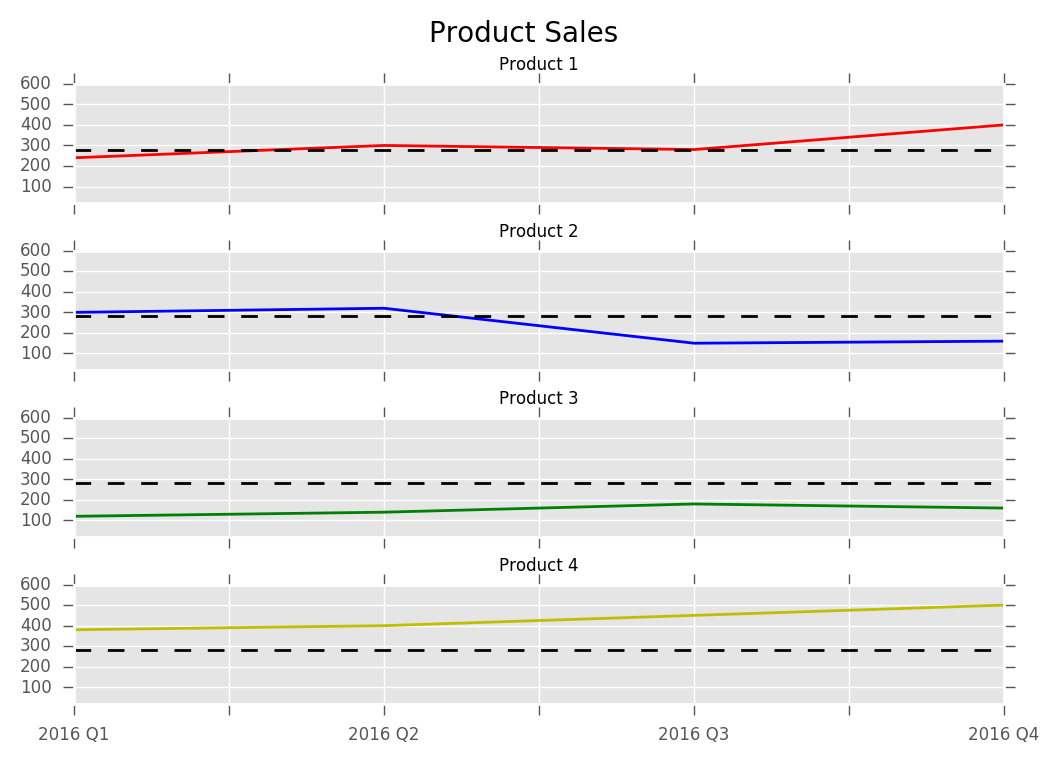

In [4]:
## Your code here
products = [badLineProduct1, badLineProduct2, badLineProduct3, badLineProduct4]
fig, axes = plt.subplots(nrows=4)
minY = min([min(p) for p in products])
maxY = max([max(p) for p in products])
meanY = np.mean([np.mean(p) for p in products])
colors = ["r-", "b-", "g-", "y-"]

badLineNames = ["2016 Q1", "", "2016 Q2", "", "2016 Q3", "", "2016 Q4"]

for i, ax in enumerate(axes):
    ax.plot(products[i], colors[i])
    ax.plot([meanY]*4, "k--")
    ax.set_ylim(minY-100, maxY+100)
    ax.set_title("Product {}".format(i+1), fontsize=6)
    if i == 3:
        ax.set_xticklabels(badLineNames, fontsize=6)
    else:
        ax.set_xticklabels((), fontsize=6)
    plt.setp(ax.get_yticklabels(), fontsize=6)

fig.suptitle("Product Sales")
fig.subplots_adjust(hspace=0.4)

Now that you've created a better plot, try to describe a pattern in the dataset. Use the following questions as a reference:

1. How do different data points compare? Are there significant differences? Are there any outliers?
2. If comparing data/series, how do they rank? Is there a significant difference between rankings?
3. If looking at data over time, is there any seasonality? How do the values compare to the mean and/or median? How do the values change over time? Ex. Ups and downs? Always up? Always down?

**Your Answer Here:**

* We can see that Product 4 is the best one overall and project 3 is the worst. 
* We can also see that product 1 improved significantly in the last quarter and Product 2 did worse towards the end of the year. This may be due to sales of Product 2 going to Product 1.
* Even though Product 3 did the worst, it was slowly improving in the 2nd and 3rd quarters.

Now look through the following bad visualizations and apply the above workflow to:

1. Determine what makes them bad
1. Create a better visualization
1. Describe a pattern in the data

## Bad Pie Chart

Explain why this visualization is a bad one:

![Bad Pie Chart](http://imgur.com/Wg9DOZd.png)

**Your Answer Here:**

It's a pie chart. Makes it hard to compare the values.

In [5]:
badPieNames = ["Golden", "Boulder", "Denver", "Colo Springs"]
badPieValues = [0.37, 0.4, 0.5, 0.35]

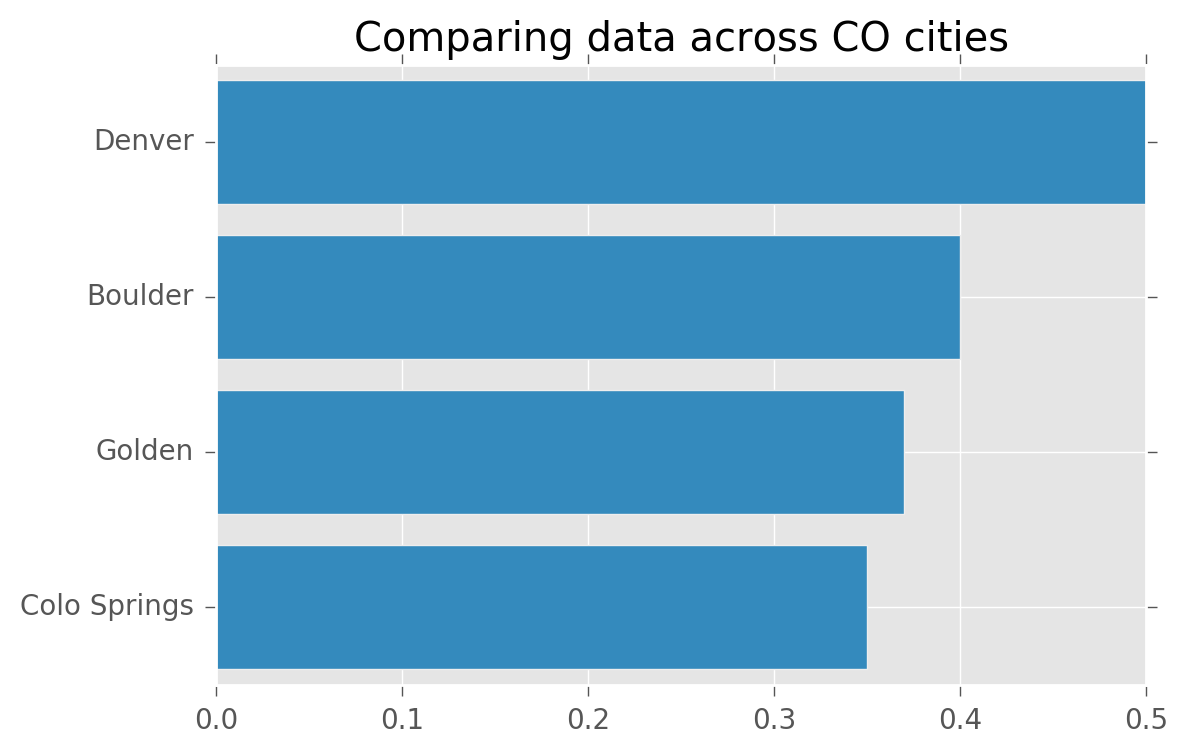

In [6]:
# Plot a better chart using this data
import operator
data = dict(zip(badPieNames,badPieValues))
sorted_data = sorted(data.items(), key=operator.itemgetter(1))
sorted_keys = [d[0] for d in sorted_data]
sorted_values = [d[1] for d in sorted_data]
plt.barh(range(len(badPieValues)), sorted_values, tick_label=sorted_keys, align="center")
plt.title("Comparing data across CO cities")
plt.show()

Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

Denver has the highest value followed by Boulder, Golden then Colo Springs. We can also see that there is a large gap between first and second when compared to the later ranks.

## Bad Bar Chart 1

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/AkLyM9I.png)

**Your Answer Here:**

The y axis does not start at 0.

In [7]:
badBarNames = ["A", "B", "C"]
badBarValues = [240, 242, 250]

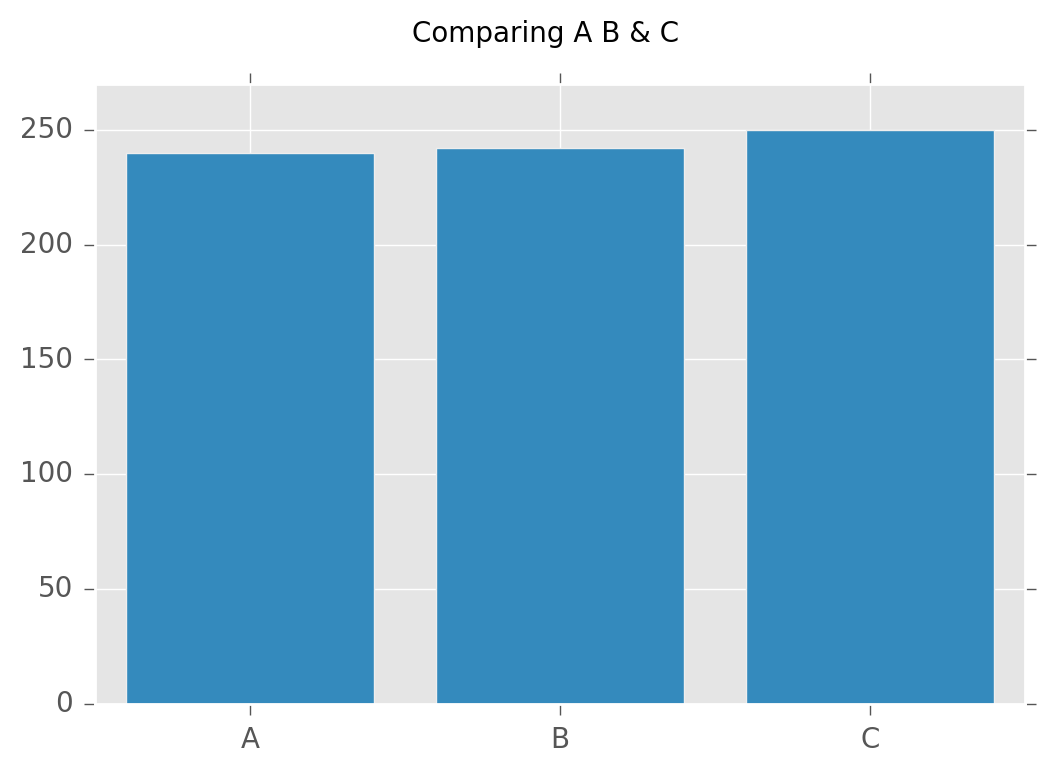

In [8]:
# Plot a better chart using this data
ind = np.arange(3)

plt.bar(ind, badBarValues, align="center")
plt.xticks(ind, badBarNames)
plt.ylim(0, 270)
plt.suptitle("Comparing A B & C")
plt.show()

Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

C has the highest value followed by B and then A but the difference is not very significant.

## Bad Bar Chart 2

Explain why this visualization is a bad one:

![Bad Bar Chart](http://imgur.com/Ns3lgyp.png)

**Your Answer Here:**

>Edit this portion with your answer

In [9]:
badBar2Names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
badBar2Values = [240, 320, 360, 280, 290, 300, 500, 410, 390, 200, 220, 240]

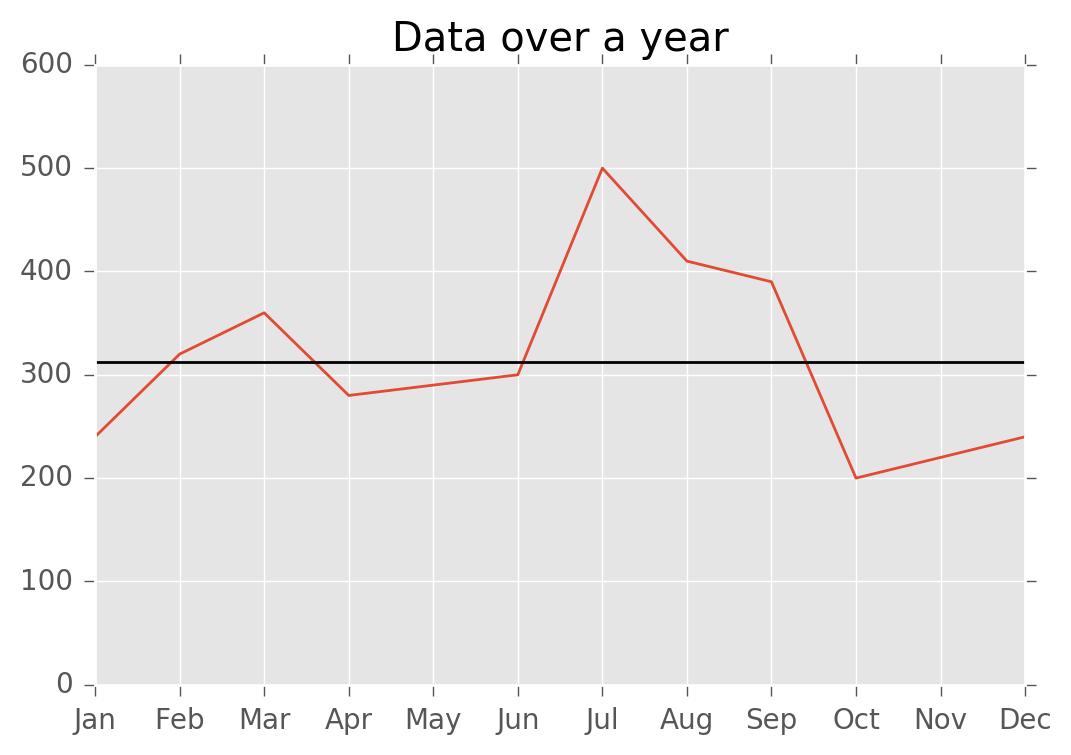

In [10]:
# Plot a better chart using this data
plt.plot(badBar2Values)
plt.xticks(range(len(badBar2Values)),badBar2Names)
plt.ylim(0, max(badBar2Values)+ 100)
plt.title("Data over a year")
plt.plot([np.mean(badBar2Values)]*len(badBar2Values), "k-")
plt.show()

Tell a story or describe a pattern using your new visualization.

**Your Answer Here:**

The data seems to be generally higher in the summer months. (July and August are the highest months) We can tell that there may be some seasonal effect on the data.